# Exploratory Analysis Index

# 1. Get unique values
# 2. fetching int from string (Timestamp)
# 3. Finding duplicates (reduces complexity)
# 4. Data slicing
# 5. Convert interger column to categorical
# 6. find mean medin of each coloum using descirbe
# 7. Find outlier from column using IQR
# 8. Check class imbalance using plots
# 9. Heatmaps to see similar features 

In [ ]:
# Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Read dataset

dfCity=pd.read_csv("datasets/innercity.csv")
dfCity.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


In [5]:
#shape of dataset

dfCity.shape

(21613, 23)

In [6]:
# check null and object types

dfCity.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  int64  
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  int64  
 6   lot_measure       21613 non-null  int64  
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  int64  
 10  condition         21613 non-null  int64  
 11  quality           21613 non-null  int64  
 12  ceil_measure      21613 non-null  int64  
 13  basement          21613 non-null  int64  
 14  yr_built          21613 non-null  int64  
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [7]:

# find out the unique value to make categorical variable
# could be also used to see outliers or extreme values


print('Bed Rooms')
print(sorted(list(dfCity.room_bed.unique())))
print('Bath Rooms')
print(sorted(list(dfCity.room_bath.unique())))
print('Coast')
print(sorted(list(dfCity.coast.unique())))
print('sight')
print(sorted(list(dfCity.sight.unique())))
print('condition')
print(sorted(list(dfCity.condition.unique())))
print('quality')
print(sorted(list(dfCity.quality.unique())))
print('basemnet')
print(sorted(list(dfCity.basement.unique())))
print('furnished')
print(sorted(list(dfCity.furnished.unique())))

Bed Rooms
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33]
Bath Rooms
[0.0, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.5, 7.75, 8.0]
Coast
[0, 1]
sight
[0, 1, 2, 3, 4]
condition
[1, 2, 3, 4, 5]
quality
[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
basemnet
[0, 10, 20, 40, 50, 60, 65, 70, 80, 90, 100, 110, 120, 130, 140, 143, 145, 150, 160, 170, 172, 176, 180, 190, 200, 207, 210, 220, 225, 230, 235, 240, 243, 248, 250, 260, 265, 266, 270, 274, 276, 280, 283, 290, 295, 300, 310, 320, 330, 340, 350, 360, 370, 374, 380, 390, 400, 410, 414, 415, 417, 420, 430, 435, 440, 450, 460, 470, 475, 480, 490, 500, 506, 508, 510, 515, 516, 518, 520, 530, 540, 550, 556, 560, 570, 580, 588, 590, 600, 602, 610, 620, 630, 640, 650, 652, 660, 666, 670, 680, 690, 700, 704, 710, 720, 730, 740, 750, 760, 768, 770, 780, 784, 790, 792, 800, 810, 820, 830, 840, 850, 860, 861, 862, 870, 875, 880, 890, 894, 900, 906, 910, 91

In [8]:
#check outlier

dfCity[dfCity.room_bed==33]

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
750,2402100895,20140625T000000,640000,33,1.75,1620,6000,1.0,0,0,...,580,1947,0,98103,47.6878,-122.331,1330,4700,0,7620


In [11]:
a = "1/4/2012 16:00:00   27.47"
b = "1/4/2012 16:00:00   27.47sssssssss"

In [7]:
s = "1/4/2012 16:00:00   27.47"
s = '{0:0<22}'.format(s)

In [8]:
s

'1/4/2012 16:00:00   27.47'

In [14]:
a = a.ljust(50, '0')
b = b.ljust(50, '0')

In [15]:
a

'1/4/2012 16:00:00   27.470000000000000000000000000'

In [16]:
b

'1/4/2012 16:00:00   27.47sssssssss0000000000000000'

In [9]:
# to take the years_sold from dayhours colums
#fetch first four character from dayshours and create it as new coloumn

dfCity['yr_sold']=dfCity['dayhours'].apply(lambda x:x[:4]).astype(int)
dfCity.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,yr_sold
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,1956,0,98133,47.7174,-122.336,2120,7553,1,16477,2014
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,1976,0,98023,47.3165,-122.386,2260,8800,0,10050,2014
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,2006,0,98038,47.3515,-121.999,2370,4348,0,6694,2015
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,1916,0,98133,47.7049,-122.349,1520,3844,0,4664,2014
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,1954,0,98115,47.6768,-122.269,1900,5940,0,5450,2015


In [10]:
# create feature (new column)

dfCity['age_sold']=dfCity.yr_sold-dfCity.yr_built
dfCity.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,yr_sold,age_sold
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,98133,47.7174,-122.336,2120,7553,1,16477,2014,58
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,0,98023,47.3165,-122.386,2260,8800,0,10050,2014,38
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,0,98038,47.3515,-121.999,2370,4348,0,6694,2015,9
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,0,98133,47.7049,-122.349,1520,3844,0,4664,2014,98
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,0,98115,47.6768,-122.269,1900,5940,0,5450,2015,61


In [11]:
#finding duplicates
# Total number of rows and columns
print(dfCity.shape)

# Rows containing duplicate data
duplicate_rows_df = dfCity[dfCity.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)


(21613, 25)
number of duplicate rows:  (0, 25)


In [12]:
# filerting room with three only
new_data = dfCity[dfCity["room_bed"] == 3]
new_data.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,yr_sold,age_sold
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,0,98038,47.3515,-121.999,2370,4348,0,6694,2015,9
5,5525400430,20140715T000000,585000,3,2.50,2050,11690,2.0,0,0,...,0,98059,47.5279,-122.161,2410,10172,1,13740,2014,25
6,2419600075,20141201T000000,465000,3,1.75,1480,6360,1.0,0,0,...,0,98133,47.7311,-122.353,1480,6360,0,7840,2014,60
7,114101161,20140829T000000,480000,3,1.50,2100,67269,1.0,0,0,...,0,98028,47.7592,-122.230,1610,15999,0,69369,2014,65
15,1387301730,20150202T000000,361000,3,1.50,1200,7236,1.0,0,0,...,0,98011,47.7390,-122.194,1680,7800,0,8436,2015,40


In [13]:
# data slicing and filter


new_data1 = dfCity[["room_bed", "dayhours"]]
new_data1.head()
new_data1 = new_data1[new_data1["room_bed"]==4]
new_data1.head()

,room_bed,dayhours
0,4,20141107T000000
1,4,20141204T000000
8,4,20140707T000000
9,4,20140918T000000
11,4,20141027T000000


In [14]:
#indexing and slicing the data

dfCity.iloc[:,4:6]

,room_bath,living_measure
0,3.25,3020
1,2.50,2550
2,2.50,2370
3,1.00,820
4,1.50,1400
...,...,...
21608,2.50,2303
21609,2.50,3490
21610,2.75,2790
21611,2.00,1440


In [15]:
##we have certain features that are displayed as integer, but we know that we need to fix them into categories

dfCity.coast=pd.Categorical(dfCity.coast)
dfCity.condition=pd.Categorical(dfCity.condition)
dfCity.quality=pd.Categorical(dfCity.quality)
dfCity.furnished=pd.Categorical(dfCity.furnished)
dfCity.sight=pd.Categorical(dfCity.sight)

In [16]:
dfCity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   cid               21613 non-null  int64   
 1   dayhours          21613 non-null  object  
 2   price             21613 non-null  int64   
 3   room_bed          21613 non-null  int64   
 4   room_bath         21613 non-null  float64 
 5   living_measure    21613 non-null  int64   
 6   lot_measure       21613 non-null  int64   
 7   ceil              21613 non-null  float64 
 8   coast             21613 non-null  category
 9   sight             21613 non-null  category
 10  condition         21613 non-null  category
 11  quality           21613 non-null  category
 12  ceil_measure      21613 non-null  int64   
 13  basement          21613 non-null  int64   
 14  yr_built          21613 non-null  int64   
 15  yr_renovated      21613 non-null  int64   
 16  zipcode           2161

In [17]:
dfCity.describe().T #only display numeric cloumn also
#dfCity.describe(include='all').T #include non-numeric cloumn also

,count,mean,std,min,25%,50%,75%,max
cid,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.401822e+05,3.673622e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
room_bed,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
room_bath,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
living_measure,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
lot_measure,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
ceil,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
ceil_measure,21613.0,1.788391e+03,8.280910e+02,2.900000e+02,1.190000e+03,1.560000e+03,2.210000e+03,9.410000e+03
basement,21613.0,2.915090e+02,4.425750e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.600000e+02,4.820000e+03
yr_built,21613.0,1.971005e+03,2.937341e+01,1.900000e+03,1.951000e+03,1.975000e+03,1.997000e+03,2.015000e+03


In [18]:
#IQR method to find outlier or could use z score = (obersbvation-mean)/standard_daviation)
# Arrange the data in increasing order
# Calculate first(q1) and third quartile(q3)
# Find interquartile range (q3-q1)
# Find lower bound q1*1.5
# Find upper bound q3*1.5
# Anything that lies outside of lower and upper bound is an outlier
# Fist sorting the dataset


#1.5IQR are consider as outlier
# Analysis on Room_Bed feature
Q1=dfCity.room_bed.quantile(.25)
Q3=dfCity.room_bed.quantile(.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
print("Min Value",dfCity.room_bed.min())
print("Max Value ",dfCity.room_bed.max())
print("Q1 ",Q1)
print("Q3 ",Q3)
print("IQR ",IQR)
print('lower_limit',lower_limit)
print('upper_limit',upper_limit)

Min Value 0
Max Value  33
Q1  3.0
Q3  4.0
IQR  1.0
lower_limit 1.5
upper_limit 5.5


In [1]:
## Analysis of continous variables
#fucntion to find outlier and plot graph
def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers),  

def plotchart(col):
    fix, (ax1,ax2) =plt.subplots(1,2,figsize=(16,5))
    sn.boxplot(col, orient='v',ax=ax1)
    ax1.set_ylabel=col.name
    ax1.set_title('Box plot of {}'.format(col.name))
    sn.distplot(col,ax=ax2) 
    ax2.set_title('Distribution plot of {}'.format(col.name))
    
def analysis_column(col):
    print('count of outlier ', len(findoutliers(col)))
    print('Mean ',format(col.mean()))
    print('Median ',format(col.median()))
    print('Missing values',format(col.isnull().sum()))
    print('% of Missing values:',format(round(100*(col.isnull().sum()/len(col)),2)))
    
    plotchart(col)

In [2]:

print(findoutliers(dfCity.room_bed))
print("total outliers:", len(findoutliers(dfCity.room_bed)))

NameError: name 'dfCity' is not defined

count of outlier  546
Mean  3.37084162309721
Median  3.0
Missing values 0
% of Missing values: 0.0


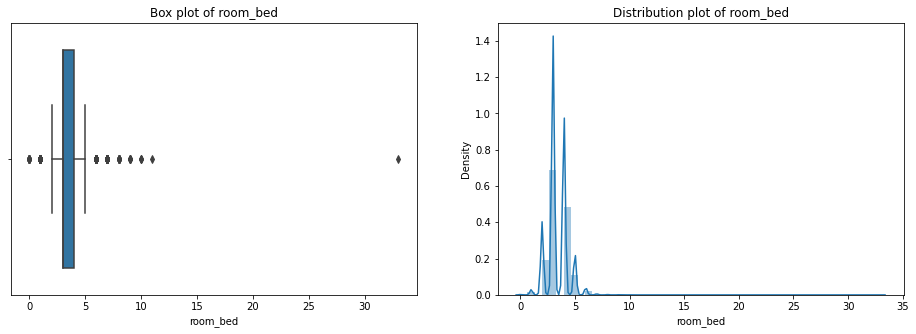

In [21]:
analysis_column(dfCity.room_bed)

<AxesSubplot:>

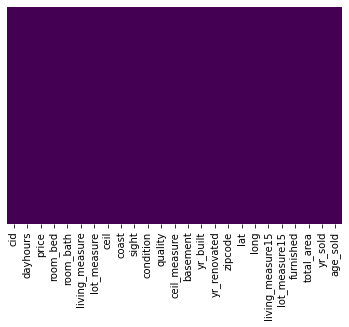

In [22]:

# to check missing value and heatmap
sn.heatmap(dfCity.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [23]:
# Check numm values in each coloumn
dfCity.isnull().sum()


cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
yr_sold             0
age_sold            0
dtype: int64

In [34]:
dfCity.isNan().sum()

AttributeError: 'DataFrame' object has no attribute 'isNan'

<AxesSubplot:>

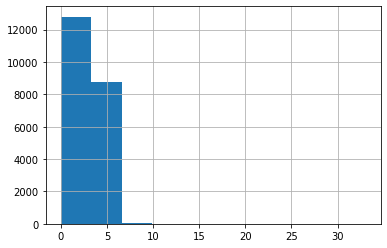

In [24]:
#histogram 
dfCity.room_bed.hist()

In [25]:
#catogorical analysis can be used to predict class or testing the data
# check class imbalance

dfCity.coast.value_counts()

0    21450
1      163
Name: coast, dtype: int64

In [26]:
dfCity.coast.value_counts(normalize=True)

0    0.992458
1    0.007542
Name: coast, dtype: float64

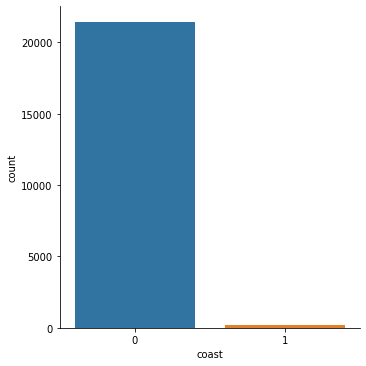

In [27]:
# to check class imbalance
sn.factorplot('coast',data=dfCity,kind='count')

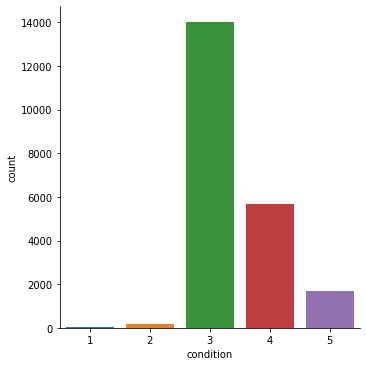

In [28]:
# to check class imbalance
sn.factorplot('condition',data=dfCity,kind='count')

In [29]:
dfCity.quality.value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: quality, dtype: int64

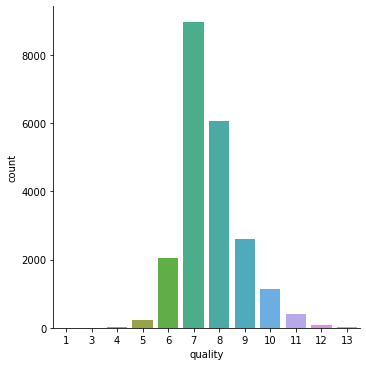

In [30]:

sn.factorplot('quality',data=dfCity,kind='count')

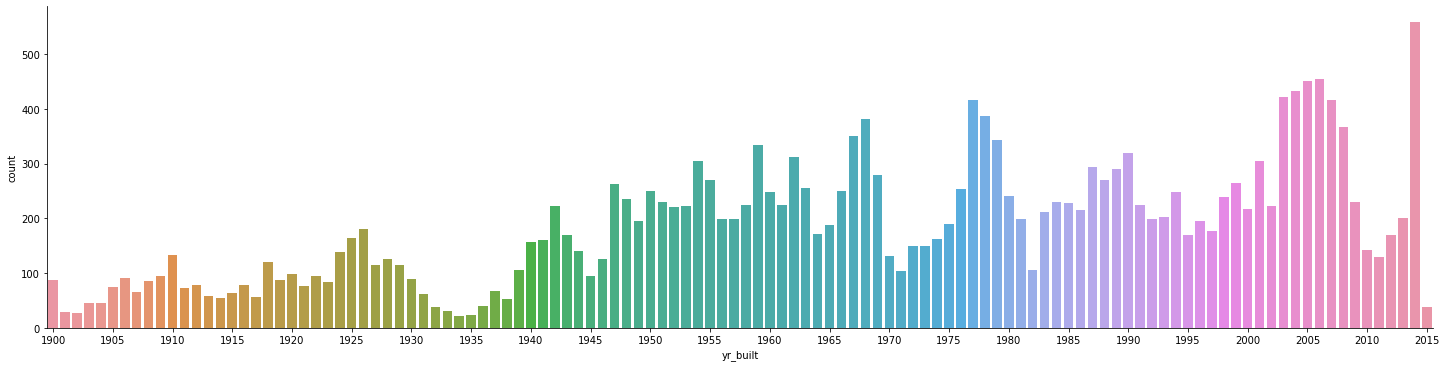

In [31]:

pl = sn.factorplot('yr_built',data=dfCity, aspect=4,kind='count')
pl.set_xticklabels(step=5)

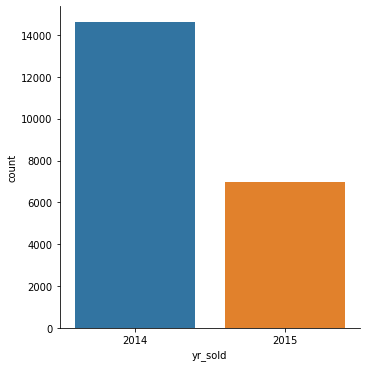

In [32]:
sn.factorplot('yr_sold',data=dfCity,kind='count')

<AxesSubplot:>

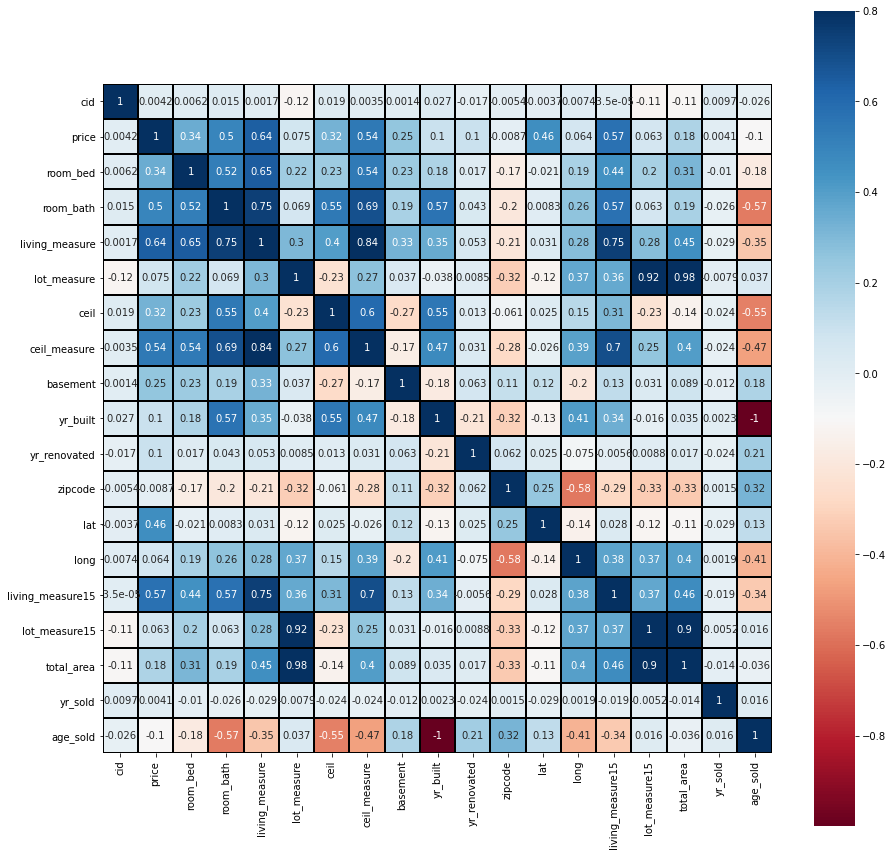

In [157]:
#to find correaltion betwenn features
# similar features can be removed to reduce the complexity

corr=dfCity.corr(method='spearman')
plt.figure(figsize=(15,15))
sn.heatmap(corr,vmax=.8,linewidths=0.01,square=True,annot=True,cmap='RdBu',linecolor='black')
# one variable influenced by other variable
# here linving measure and living measure15 are highly co-related so we can use any one of the column

<AxesSubplot:xlabel='room_bed', ylabel='price'>

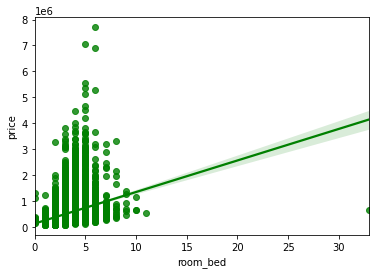

In [35]:
#
# plots between independent variables and price that is target
sn.regplot(x=dfCity.room_bed, y=dfCity.price, color='g')


<AxesSubplot:xlabel='living_measure', ylabel='price'>

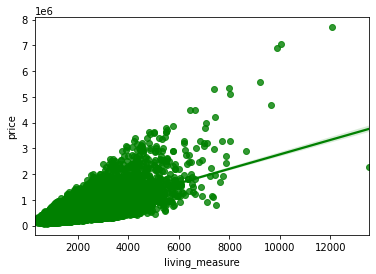

In [36]:
sn.regplot(x=dfCity.living_measure, y=dfCity.price, color='g')

In [137]:
#number of unique values
print("Number of unique value",dfCity.age_sold.nunique())
print("Max  value",dfCity.age_sold.max())
print("Min  value",dfCity.age_sold.min())

Number of unique value 117
Max  value 115
Min  value -1


In [151]:
#Print values unique values using dict to know which to use for scaling
dictt = {}
for i in dfCity:
    dictt[i] = dfCity[i].nunique()
    

In [152]:
dictt
dictt = sorted(dictt.items(), key=lambda x:x[1])
sortdict = dict(dictt)
# sorted(dictt)

In [156]:
sortdict

{'coast': 2,
 'furnished': 2,
 'yr_sold': 2,
 'sight': 5,
 'condition': 5,
 'ceil': 6,
 'quality': 12,
 'room_bed': 13,
 'room_bath': 30,
 'yr_renovated': 70,
 'zipcode': 70,
 'yr_built': 116,
 'age_sold': 117,
 'basement': 306,
 'dayhours': 372,
 'long': 752,
 'living_measure15': 777,
 'ceil_measure': 946,
 'living_measure': 1038,
 'price': 3625,
 'lat': 5034,
 'lot_measure15': 8689,
 'lot_measure': 9782,
 'total_area': 11163,
 'cid': 21436}